# Austin BCycle Data Visualization

This is my first data visualization project, where I am visualizing data from the public data on Austin's BCycle data.

### Imports

We import necessary libraries for this project. I am using matplotlib+seaborn for this project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


Here we can see the format of the dataset. We are also removing the unimportant stuff for this visualization

In [2]:
bcycle = pd.read_csv('BCycleSets.csv')

bcycle = bcycle.drop(bcycle[bcycle["Return Kiosk"] == "Missing"].index)
bcycle = bcycle.drop(bcycle[bcycle["Return Kiosk"] == "Stolen"].index)
bcycle = bcycle.drop(bcycle[bcycle["Return Kiosk"] == "Shop"].index)
bcycle = bcycle.drop(bcycle[bcycle["Return Kiosk"] == "Repair Shop"].index)
bcycle = bcycle.drop(bcycle[bcycle["Return Kiosk"] == "Main Shop"].index)

bcycle = bcycle.drop(bcycle[bcycle["Checkout Kiosk"] == "Missing"].index)
bcycle = bcycle.drop(bcycle[bcycle["Checkout Kiosk"] == "Stolen"].index)
bcycle = bcycle.drop(bcycle[bcycle["Checkout Kiosk"] == "Shop"].index)
bcycle = bcycle.drop(bcycle[bcycle["Checkout Kiosk"] == "Repair Shop"].index)
bcycle = bcycle.drop(bcycle[bcycle["Checkout Kiosk"] == "Main Shop"].index)

bcycle.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0
2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0


### Monthly Usage

Below is a countplot of the amount of rides made each month for the years between 2014 to early 2017

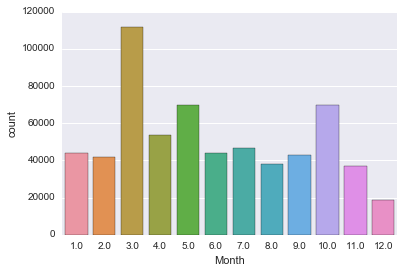

In [3]:
sns.set()
sns.countplot(bcycle["Month"])

### Usage From 2014-2017
Below is a countplot of every single day it's been used. We will notice that the spikes are all around March during Spring break for SXSW

[[]]

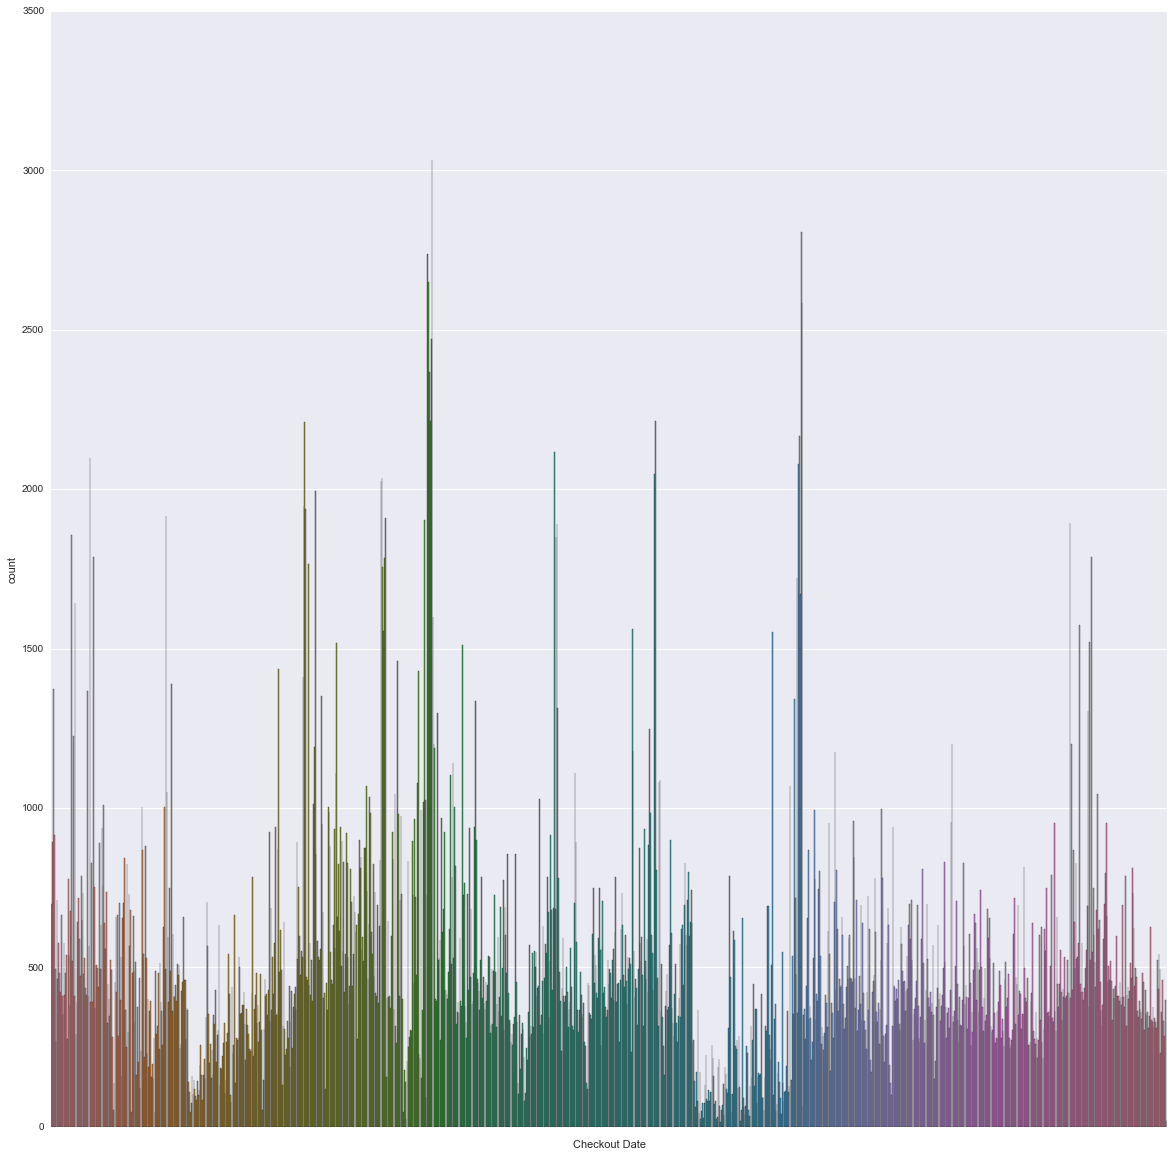

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

g = sns.countplot(bcycle["Checkout Date"], ax=ax)
g.set(xticklabels=[])

### Most Popular Checkout Kiosks

The countplot below shows us the most popular kiosks where people checkout their bikes.

Text(0.5,1,'Most Popular Checkout Kiosks')

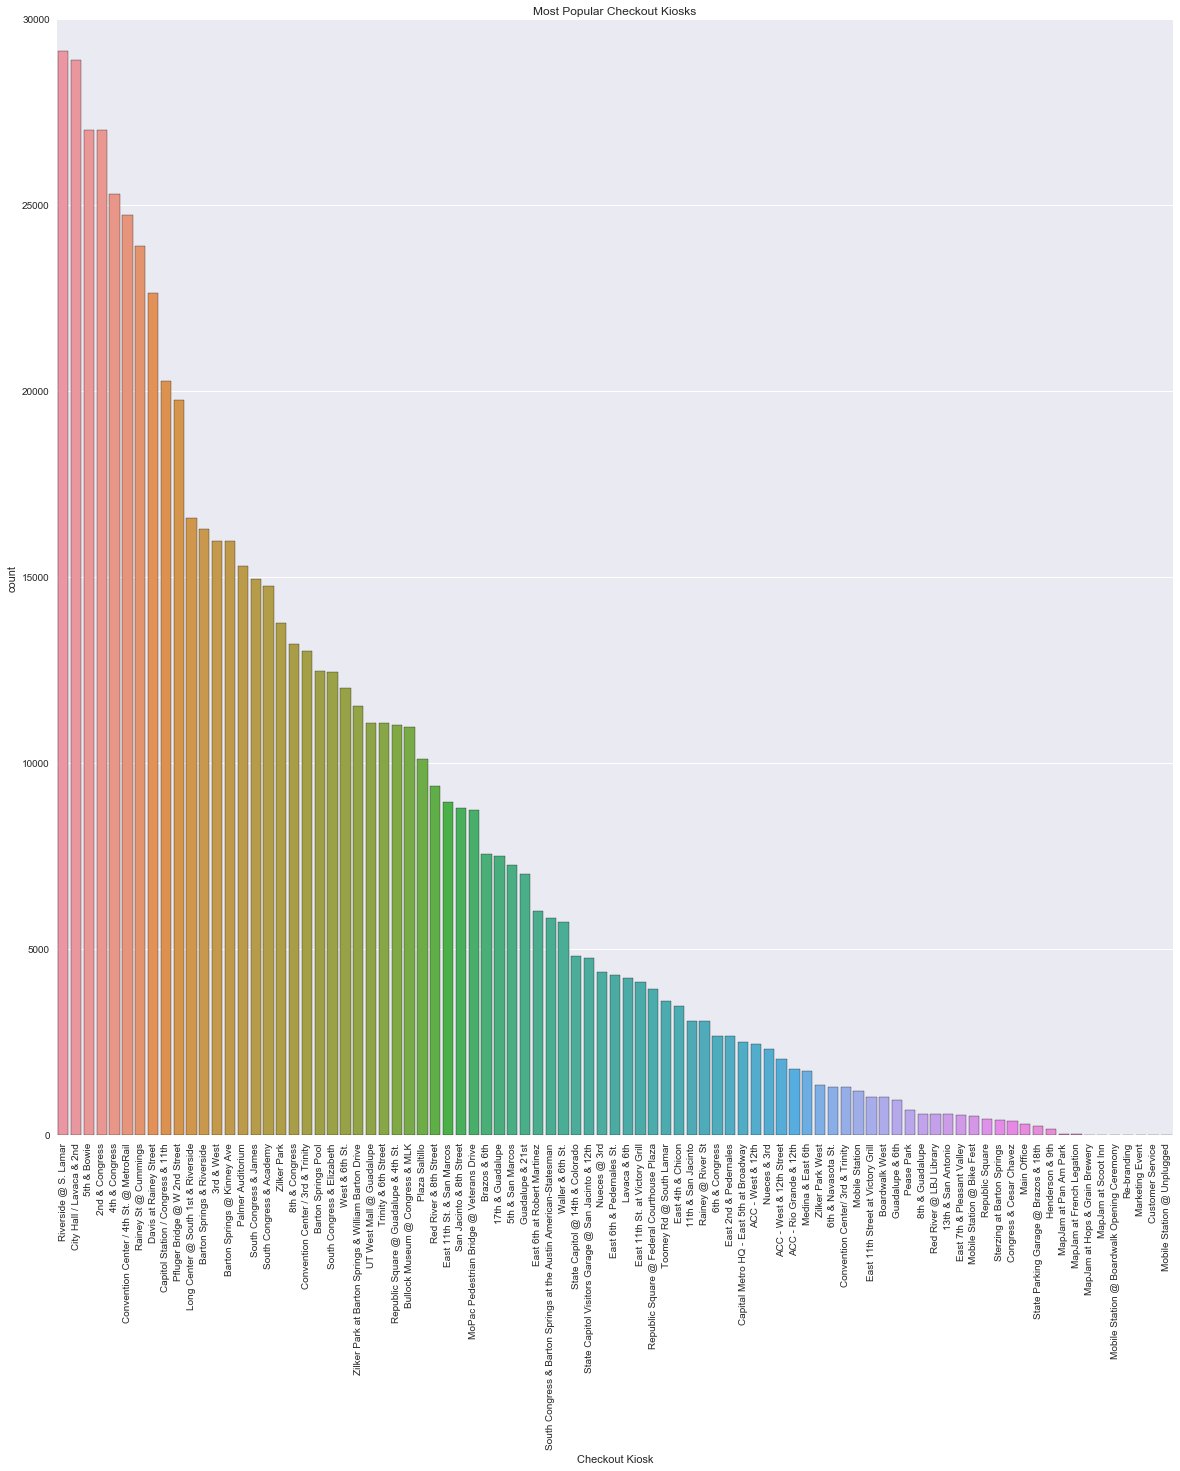

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

g = sns.countplot(bcycle["Checkout Kiosk"], ax=ax, order=bcycle["Checkout Kiosk"].value_counts().index)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Most Popular Checkout Kiosks")

### Most Popular Return Kiosks

The countplot below shows us the most popular kiosks where people return their bikes.

Text(0.5,1,'Most Popular Return Kiosks')

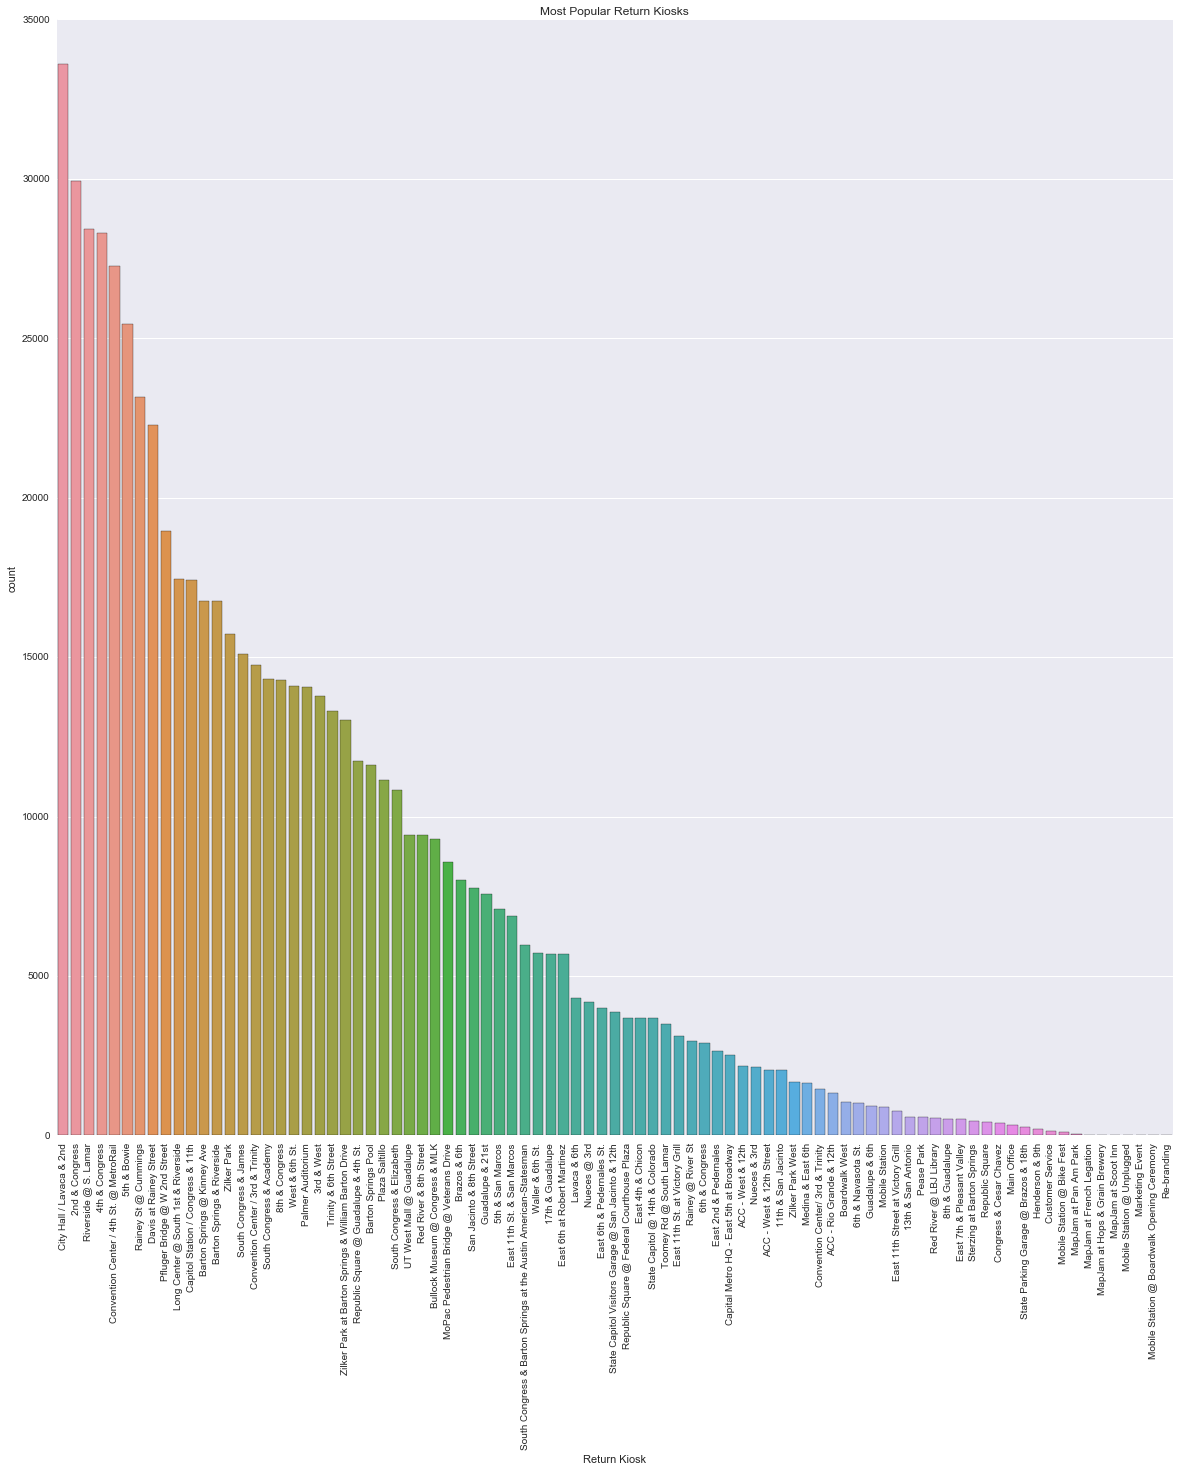

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

g = sns.countplot(bcycle["Return Kiosk"], ax=ax, order=bcycle["Return Kiosk"].value_counts().index)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Most Popular Return Kiosks")

### Box Plot for Trip Duration Minutes for Each Checkout Kiosk

This is a box plot of every checkout kiosk

Text(0.5,1,'Box Plot for Trip Duration Minutes for Checkout Kiosks')

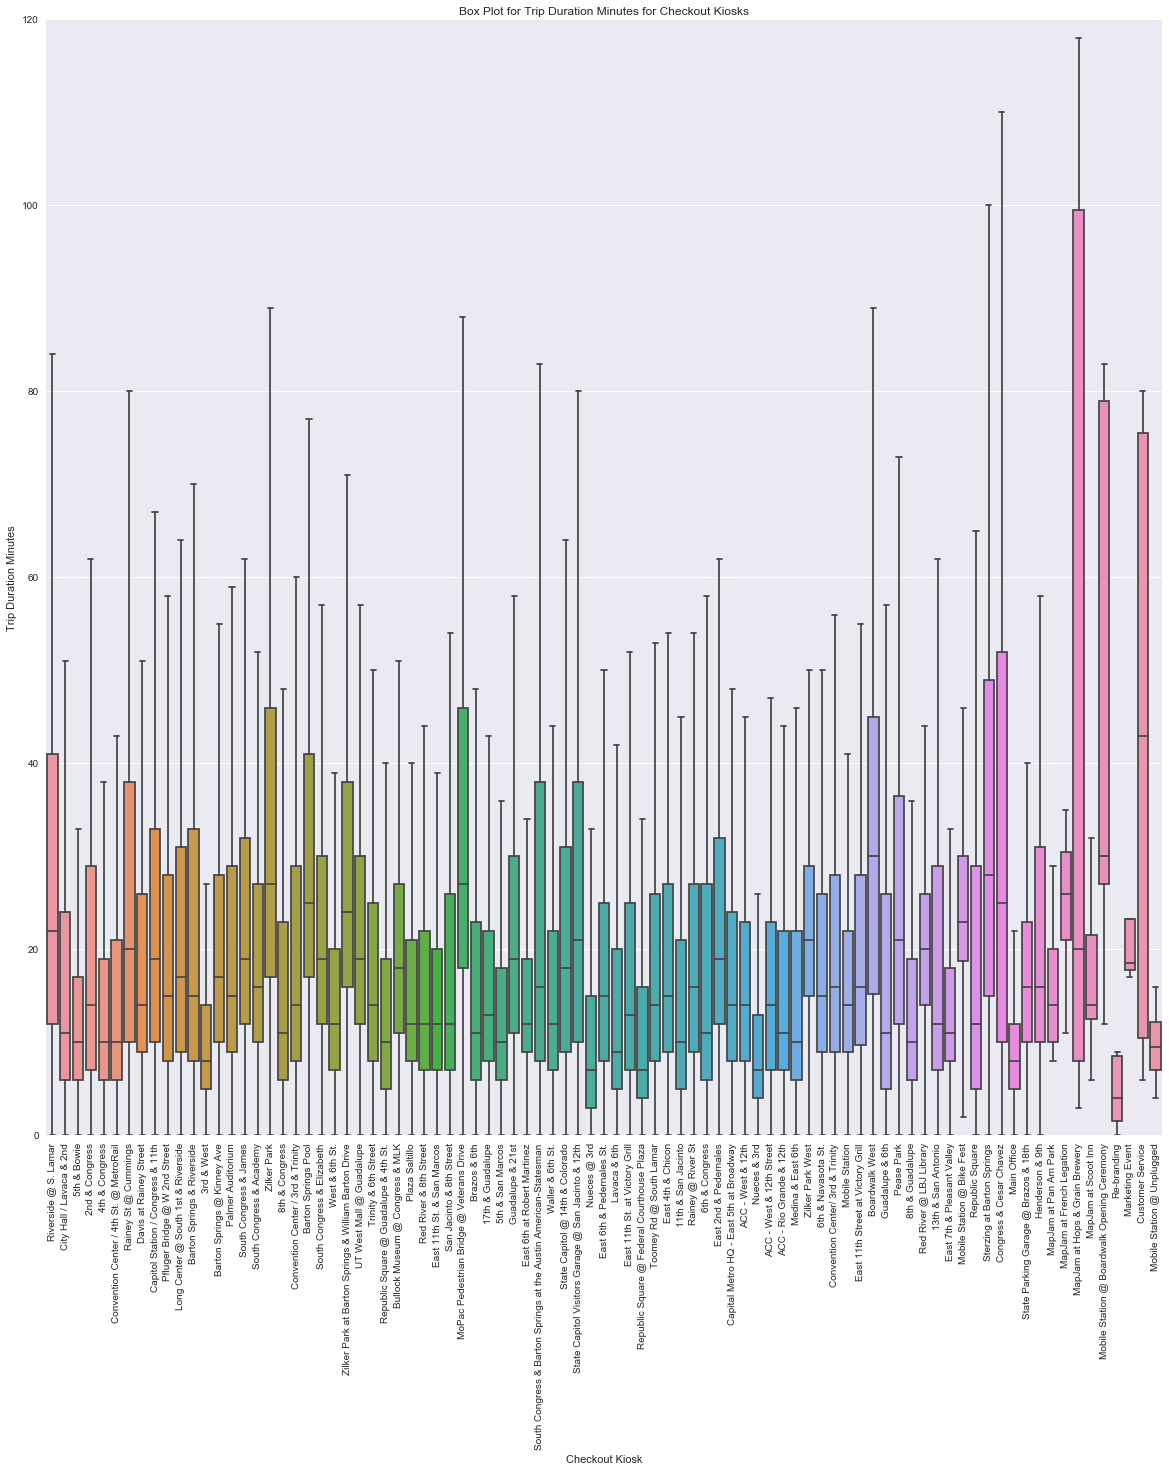

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

g = sns.boxplot(x="Checkout Kiosk", y="Trip Duration Minutes", data=bcycle, ax=ax, showfliers=False,
                order=bcycle["Checkout Kiosk"].value_counts().index)
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Box Plot for Trip Duration Minutes for Checkout Kiosks")

### Box Plot for Trip Duration Minutes for Each Return Kiosk

This is a box plot of every return kiosk

Text(0.5,1,'Box Plot for Trip Duration Minutes for Return Kiosks')

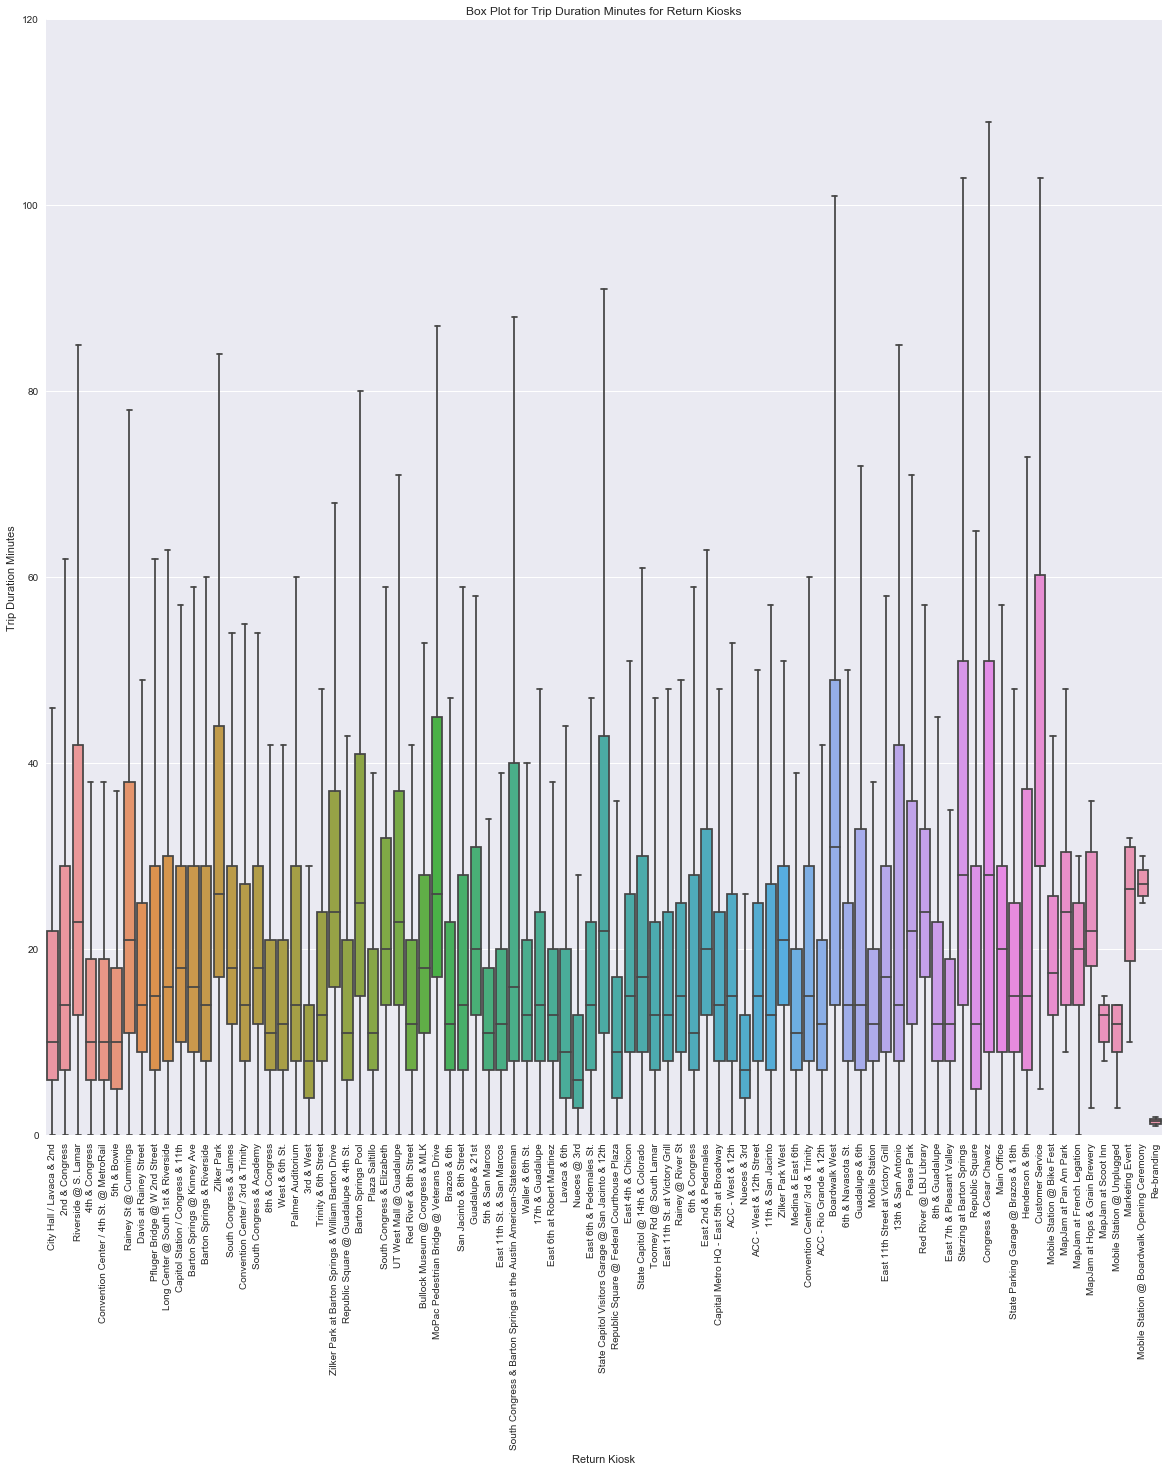

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)


g = sns.boxplot(x="Return Kiosk", y="Trip Duration Minutes", data=bcycle, ax=ax, showfliers=False,
                order=bcycle["Return Kiosk"].value_counts().index)


# g.set_xticklabels(g.get_xticklabels(),rotation=90)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Box Plot for Trip Duration Minutes for Return Kiosks")

### Heatmap of Total Trip Duration in Hours (per 1000)

This one was one of the more interesting ones to try to make compared to the other visualizations especially since I had to create create my own DataFrame rather than just use the data already in the CSV file

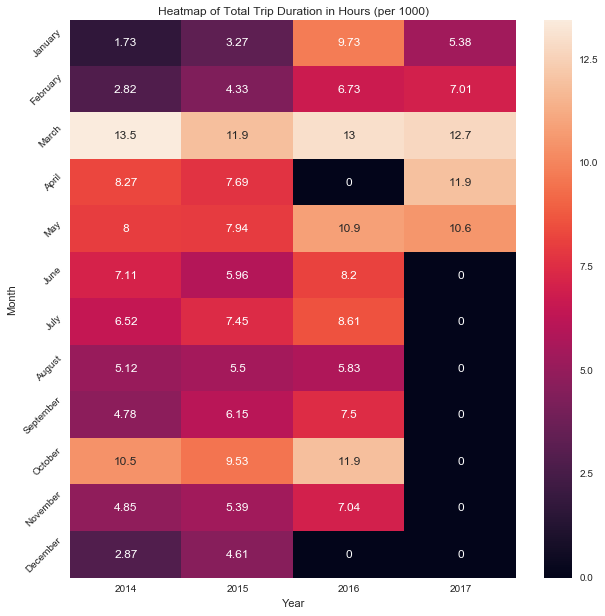

In [9]:
import calendar

f, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Heatmap of Total Trip Duration in Hours (per 1000)")
# bcycleHeatmap = bcycle.pivot(index="Month", columns="Year", values="Trip Duration Minutes")
# bcycleHeatmap = pd.DataFrame()
cols = ['Month', 'Year', 'Trip Duration in Hours (per 1000)']
list = []
for y in range(2014, 2018):
    for m in range(1, 13):
        sum = (bcycle.loc[np.logical_and(bcycle['Month'] == m, bcycle['Year'] == y), 'Trip Duration Minutes'].sum()/60)/1000
        list.append([calendar.month_name[m], y, sum])
bcycleMonthlyTimeData = pd.DataFrame(list, columns=cols)
bcycleHeatMap = bcycleMonthlyTimeData.pivot(index="Month", columns="Year", values="Trip Duration in Hours (per 1000)")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bcycleHeatMap = bcycleHeatMap.reindex(months)

g = sns.heatmap(bcycleHeatMap, annot=True, ax=ax,fmt='.3g')

for item in g.get_yticklabels():
    item.set_rotation(45)

### Most Popular Types of Memberships

This countplot looks shows all types of memberships. Something to look into is how to make an other bar to simply put all the smaller things into

Text(0.5,1,'Most Popular Types of Memberships')

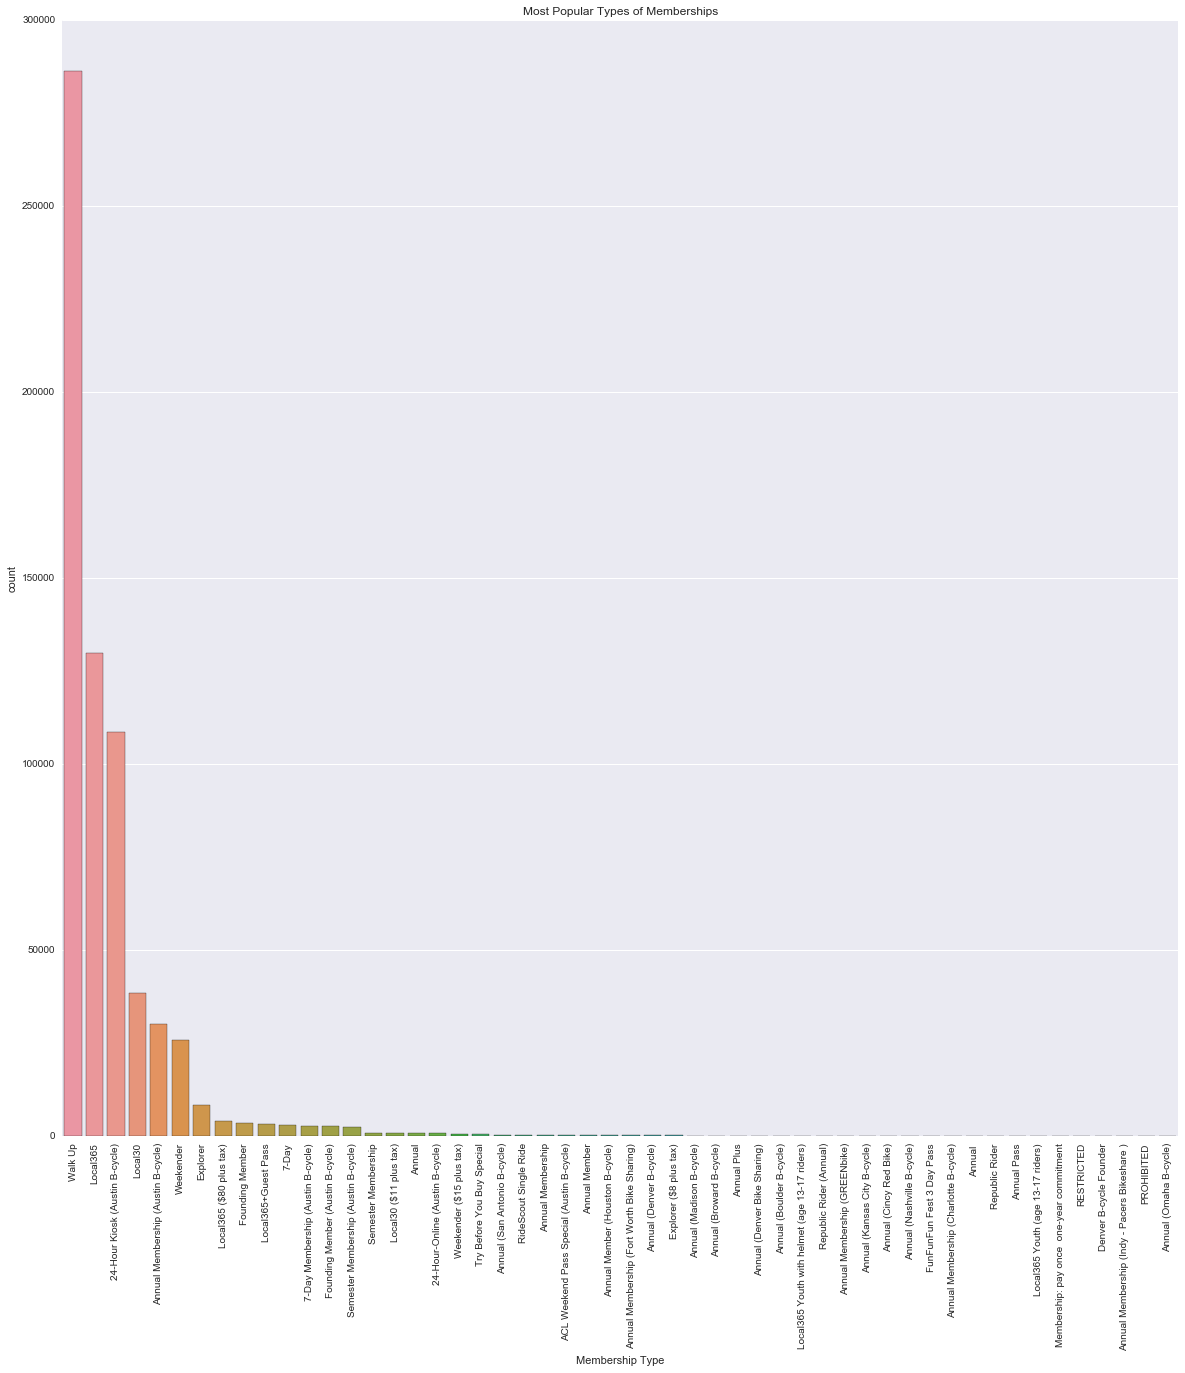

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)

g = sns.countplot(bcycle["Membership Type"], ax=ax, order=bcycle["Membership Type"].value_counts().index)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Most Popular Types of Memberships")

### Weather Analysis

Add the weather dataset for use later

In [11]:
weather = pd.read_csv("austin_weather.csv")
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


### Line Plot of Weather vs. Minutes Travelled

This line plot shows the correlation between weather and total minutes travelled per day. This one was interesting to make because I had to sum everything up as well as look at another dataset to create this one.

In [12]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

cols = ["Total Minutes", "Average Temperature"]
list = []
for singleDate in daterange(date(2014, 1, 1), date(2017, 7, 31)):
    sum = (bcycle.loc[np.logical_and(bcycle['Checkout Date'] == singleDate.strftime("%m/%d/%Y"), True), 'Trip Duration Minutes'].sum())
    temp = weather.loc[weather["Date"]==singleDate.strftime("%Y-%m-%d"), 'TempAvgF']
    if sum != 0:
        list.append([sum, temp.values[0]])
ridesWeather = pd.DataFrame(list, columns=cols)


Text(0.5,0.98,'Weather vs Total Rides per Day')

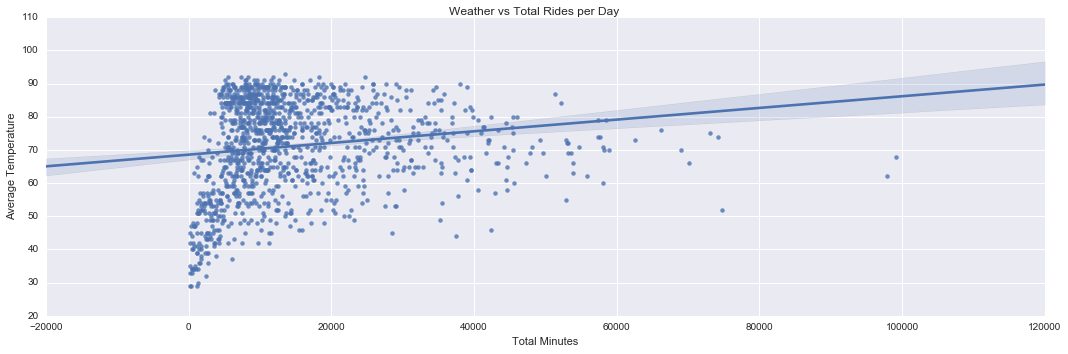

In [26]:
g = sns.lmplot(x="Total Minutes", y="Average Temperature", data=ridesWeather, aspect=3, order=1)
g.fig.suptitle("Weather vs Total Rides per Day")

### Line Plot of Weather vs. Total Rides per Day

This line plot shows the correlation between weather and total rides per day. This one was interesting to make because I had to come up with an interesting way to use datetime

In [14]:

import datetime
count = bcycle["Checkout Date"].value_counts()
count = count.to_frame()

from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

cols = ["Count", "Average Temperature"]
list = []

for index, row in count.iterrows():
    temp = weather.loc[weather["Date"]==datetime.datetime.strptime(index, '%m/%d/%Y').strftime("%Y-%m-%d"),'TempAvgF']
    c = count.at[index, "Checkout Date"]
    try:
        list.append([c, temp.values[0]])
    except:
        continue
ridesCountWeather = pd.DataFrame(list, columns=cols)

Text(0.5,0.98,'Weather vs Total Rides per Day')

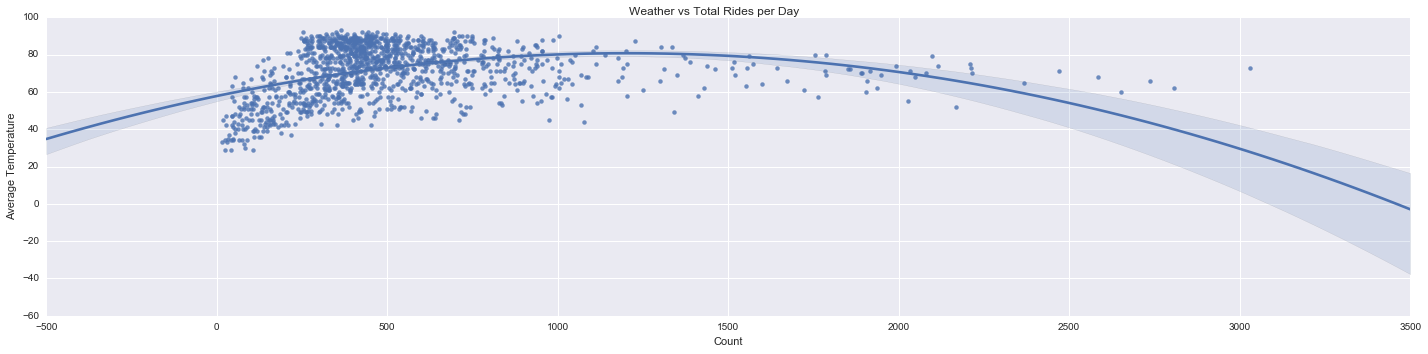

In [25]:
g = sns.lmplot(x="Count", y="Average Temperature", data=ridesCountWeather, aspect=4, order=2)
g.fig.suptitle("Weather vs Total Rides per Day")

<class 'seaborn.axisgrid.FacetGrid'>
